# Teste A/B - jogo de celular

In [1]:
# Importando as Bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats


In [2]:
df = pd.read_csv("data/cookie_cats.csv")

In [3]:
df.shape

(90189, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


In [5]:
df.head(5)

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True


In [6]:
df.describe()[["sum_gamerounds"]]

,sum_gamerounds
count,90189.000000
mean,51.872457
std,195.050858
min,0.000000
25%,5.000000
50%,16.000000
75%,51.000000
max,49854.000000


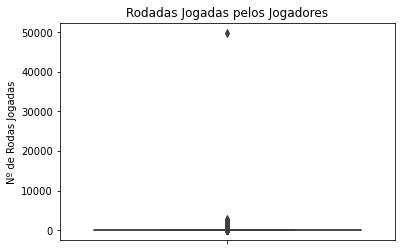

In [7]:
sns.boxplot(data=df, y=df["sum_gamerounds"])
plt.title("Rodadas Jogadas pelos Jogadores")
plt.ylabel("Nº de Rodas Jogadas")
plt.show()

In [8]:
df.groupby('version')['sum_gamerounds'].agg(["count", "median", "mean", "std", "max"])

,count,median,mean,std,max
version,,,,,
gate_30,44700,17.0,52.456264,256.716423,49854
gate_40,45489,16.0,51.298776,103.294416,2640


In [9]:
# Tratanto outliers
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df_limpo = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    
    return df_limpo

In [10]:
df = remove_outliers(df, 'sum_gamerounds')

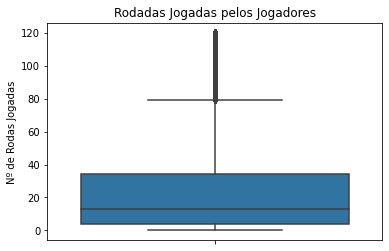

In [11]:
sns.boxplot(data=df, y=df["sum_gamerounds"])
plt.title("Rodadas Jogadas pelos Jogadores")
plt.ylabel("Nº de Rodas Jogadas")
plt.show()

In [19]:
df.groupby("version")[["retention_1", "retention_7"]].mean()

,retention_1,retention_7
version,,
gate_30,0.389096,0.118119
gate_40,0.383366,0.109798


## Hipótese:

* Hipótese Nula: h0 = não há diferença entre a retenção entre o gate_30 e gate_40.
* Hipótese Alternativa: h1 = há diferença na retenção entre os gates.

### Teste T

In [13]:
grupo_a = df[df["version"] == "gate_30"]
grupo_b = df[df["version"] == "gate_40"]

In [14]:
t_stat, p_val_ttest = stats.ttest_ind(grupo_a["sum_gamerounds"], grupo_b["sum_gamerounds"], equal_var=False)
print(f"t = {t_stat:.4f}, p = {p_val_ttest:.4f}")

t = -0.3468, p = 0.7287


### Teste qui-quadrado

In [15]:
conting_1 = pd.crosstab(df["version"], df["retention_1"])
chi2_1, p_val_chi2_1, _, _ = stats.chi2_contingency(conting_1)
print(f"chi² = {chi2_1:.4f}, p = {p_val_chi2_1:.4f}")

chi² = 2.7469, p = 0.0974


In [16]:
conting_7 = pd.crosstab(df["version"], df["retention_7"])
chi2_7, p_val_chi2_7, _, _ = stats.chi2_contingency(conting_7)
print(f"chi² = {chi2_7:.4f}, p = {p_val_chi2_7:.4f}")

chi² = 13.6357, p = 0.0002


### Visualização

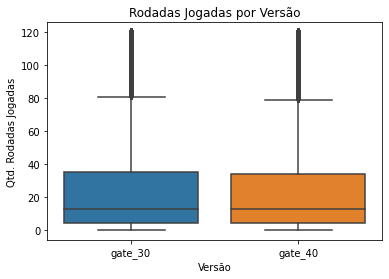

In [17]:
# Boxplot: Rodadas jogadas
sns.boxplot(data=df, x='version', y='sum_gamerounds')
plt.title("Rodadas Jogadas por Versão")
plt.xlabel("Versão")
plt.ylabel("Qtd. Rodadas Jogadas")
plt.show()


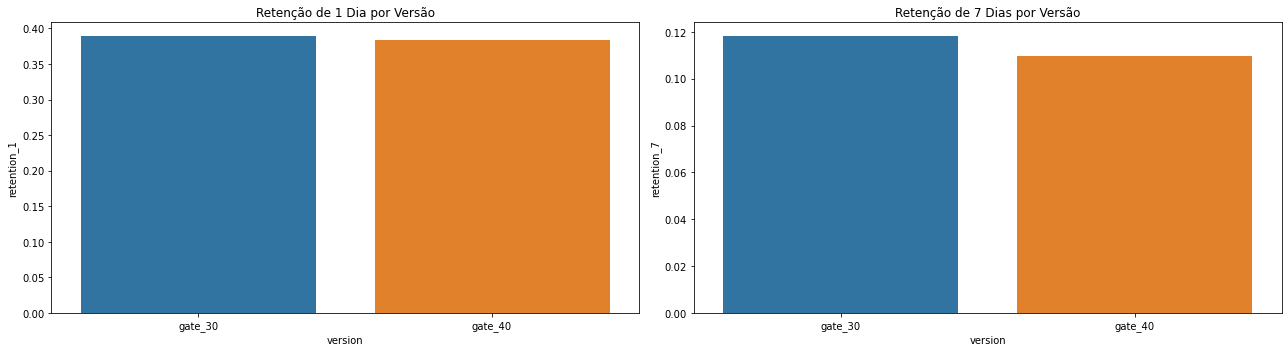

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(18, 5))

# Barplot: Retenção 1 dia
ret_1 = df.groupby("version")["retention_1"].mean().reset_index()
sns.barplot(data=ret_1, x='version', y='retention_1', ax=axes[0])
axes[0].set_title('Retenção de 1 Dia por Versão')

# Barplot: Retenção 7 dias
ret_7 = df.groupby("version")["retention_7"].mean().reset_index()
sns.barplot(data=ret_7, x='version', y='retention_7', ax=axes[1])
axes[1].set_title('Retenção de 7 Dias por Versão')

plt.tight_layout()
plt.show()